# Introduction to Simple Linear Regression 

Simple linear regression is a great first machine learning algorithm to implement as it requires you to estimate properties from your training dataset, but is simple enough for beginners to understand. 

Linear regression is a statistical model that examines the linear relationship between two (Simple Linear Regression ) or more (Multiple Linear Regression) variables — a dependent variable and independent variable(s). Linear relationship basically means that when one (or more) independent variables increases (or decreases), the dependent variable increases (or decreases) too:
<img src="http://drive.google.com/uc?export=view&id=1h5kPBqU4fmYvAfKxEDaU0EnEnzq3kwS4" />

Linear regression assumes a linear or straight line relationship between the input variables (X) and the single output variable (y). More specifically, that output (y) can be calculated from a linear combination of the input variables (X). When there is a single input variable, the method is referred to as a simple linear regression.

#### Mathematical Equation
A relationship between variables Y and X is represented by this equation:

Y = mX + b

In this equation, Y is the dependent variable — or the variable we are trying to predict or estimate; X is the independent variable — the variable we are using to make predictions; m is the slope of the regression line — it represent the effect X has on Y. Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

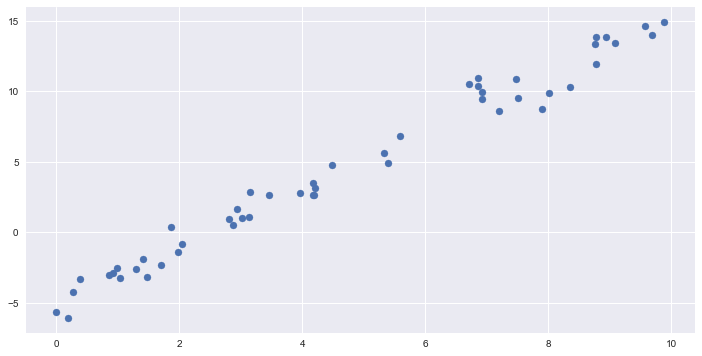

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
plt.rcParams['figure.figsize'] = (12, 6)

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

Visually, we can observe that there is a linear relationship between x & y variables. But, let's confirm this theroy statistically by using Scikit-Learn's LinearRegression estimator to fit this data and construct the best-fit line.

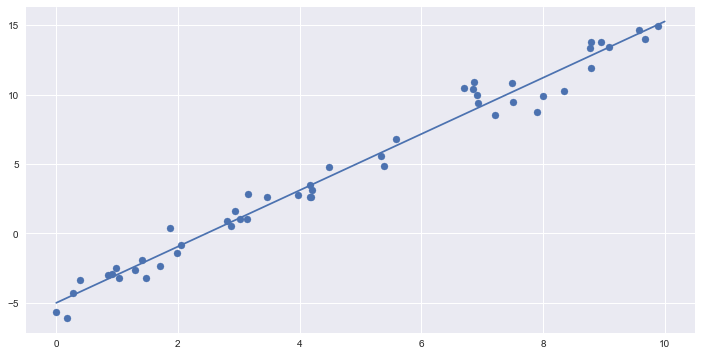

In [2]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True) # creating Linear Regression model with default parameters
model.fit(x[:, np.newaxis], y) # Fit the datapoints and train the model

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis]) # Predict the values using new set of datapoints to build the slope

plt.scatter(x, y) # Plot original dataset
plt.plot(xfit, yfit); # Plot the slope of the dataset linear relationship

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore. Here the relevant parameters are coef_ and intercept_:

In [3]:
print("Model slope:    ", model.coef_)
print("Model intercept:", model.intercept_)

Model slope:     [ 2.02720881]
Model intercept: -4.99857708555


This means Y = (2.0272)*X + (-4.9985)

Now, let's find how good is our model. There are three primary metrics used to evaluate linear models. These are: Mean absolute error (MAE), Mean squared error (MSE), or Root mean squared error (RMSE).

MAE: Mean Absolute Error, The easiest to understand. Represents average error and works will with datasets having outliers.

MSE: Mean Squared Error, Similar to MAE but noise is exaggerated and larger errors are “punished” i.e. outliers. It is harder to interpret than MAE as it’s not in base units, however, it is generally more popular.

RMSE: Most popular metric, similar to MSE, however, the result is square rooted to make it more interpretable as it’s in base units. It is recommended that RMSE be used as the primary metric to interpret your model. Typical performance measure for regression problems is the Root Mean Square Error (RMSE). It measures the standard deviation4 of the errors the
system makes in its predictions.

Golden Rule - Higher the value, better the model. Also if we compare the RMSE with Mean of y then you can see the RMSE is 20% of the mean of target variable.

In [4]:
from sklearn import metrics # Import metrics library

y_pred = model.predict(x[:, np.newaxis])

print('MAE       : ', metrics.mean_absolute_error(y_pred, y))
print('MSE       : ', metrics.mean_squared_error(y_pred, y))
print('RMSE      : ', np.sqrt(metrics.mean_squared_error(y_pred, y)))
print('Mean of y : ', np.mean(y))

MAE       :  0.720043698336
MSE       :  0.818338857027
RMSE      :  0.904620836056
Mean of y :  4.46799341249


Once you have obtained your error metric/s, take note of which X’s have minimal impacts on y. Removing some of these features may result in an increased accuracy of your model.

So, We begin a process of trial and error, where the process is started over again, until a satisfactory model is produced. The steps below may be useful for this particular part: (1) Replace feature_cols & X (2) Train_test_split your data (3) Fit the model to linreg again using linreg.fit (4) Make predictions using (y_pred = linreg.predict(X_test)) (5) Compute RMSE (6) Repeat until RMSE satisfactory.

Let's take another dataset and understand how linear regression model predicts the values. We are going to use students scores which has 2 parameters i.e. hours studied and scores. We will use this dataset to predict score through hours studied feature. Let's load the csv data file and look into the statistical details of the dataset.

In [5]:
import pandas as pd

dataset = pd.read_csv('https://raw.githubusercontent.com/anup-jana/Python-Machine-Learning/master/Datasets/student_scores.csv')
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Let's plot the graph and observe the relationship between the feature and target variable

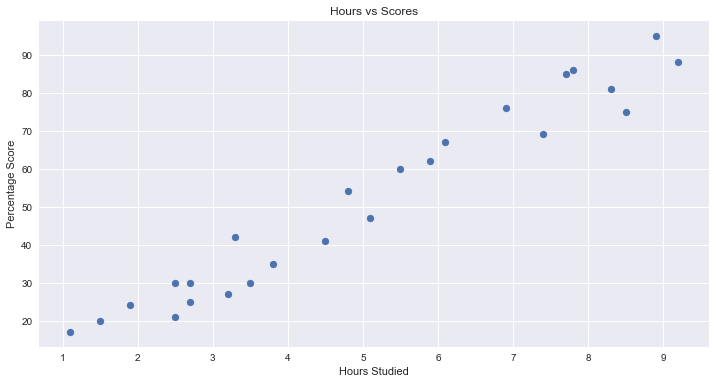

In [6]:
plt.scatter(dataset['Hours'], dataset['Scores']) # Plot original student score dataset 
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score');

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

The next step is to divide the data into "attributes" and "labels". Attributes are the independent variables while labels are dependent variables whose values are to be predicted. In our dataset we only have two columns. We want to predict the percentage score depending upon the hours studied. Therefore our attribute set will consist of the "Hours" column, and the label will be the "Score" column. 

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method

In [7]:
from sklearn.model_selection import train_test_split 

X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 1].values
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

The above script splits 80% of the data to training set while 20% of the data to test set. The test_size variable is where we actually specify the proportion of test set.

#### Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm. Once, the model is trained, let's see the various metrics related to the model.

In [8]:
from sklearn.linear_model import LinearRegression  

regressor = LinearRegression()  
regressor.fit(X_train, y_train)  

print('Intercept Value: ', regressor.intercept_)
print('Coefficient / Slope: ',regressor.coef_)  

Intercept Value:  2.01816004143
Coefficient / Slope:  [ 9.91065648]


This means that for every one unit of change in hours studied, the change in the score is about 9.91%. Or in simpler words, if a student studies one hour more than they previously studied for an exam, they can expect to achieve an increase of 9.91% in the score achieved by the student previously.

#### Making Predictions
Now that we have trained our algorithm, it's time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score. Once, the scores are predicted, let's compare the actual output values for X_test with the predicted values.

In [9]:
y_pred = regressor.predict(X_test) 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df  

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Though our model is not very precise, the predicted percentages are close to the actual ones. Now, let's find how good is our model. Evaluate Mean absolute error (MAE), Mean squared error (MSE), or Root mean squared error (RMSE) of actual and predicted values

In [10]:
from sklearn import metrics  

print('Mean Absolute Error    :', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error     :', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean of Scores         :', np.mean(dataset['Scores']))

Mean Absolute Error    : 4.183859899
Mean Squared Error     : 21.5987693072
Root Mean Squared Error: 4.6474476121
Mean of Scores         : 51.48


You can see that the value of RMSE is 4.64, which is less than 10% of the mean value of the percentages of all the students i.e. 51.48. This means that our algorithm did a good job. Try to solve more problems which will fit into simple linear regression and understand the concepts and how the model really works. Happy Learning!